# Stock Price Forecasting in an Inflationary market using Artificial Neural Networks

P22: Kartik Rawool, Aadil Tajani, Kaustubh Deshpande

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import cufflinks as cf
cf.go_offline()
plt.style.use('seaborn')
sns.set(rc={'figure.figsize':(13.7,10.27)})

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Let's take a look at the dataset

In [ ]:
df = pd.read_csv('GOOG.csv')
# df = df.set_index('Date')
df.head()

FileNotFoundError: ignored

Dataset Columns Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4571 non-null   object 
 1   Open       4571 non-null   float64
 2   High       4571 non-null   float64
 3   Low        4571 non-null   float64
 4   Close      4571 non-null   float64
 5   Adj Close  4571 non-null   float64
 6   Volume     4571 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 250.1+ KB


Getting the max and min close values from each year

In [ ]:
agg = pd.DataFrame()
agg['Date'] = pd.to_datetime(df['Date'])
agg['Close'] = df.Close
agg.groupby(agg.Date.dt.year).agg({'Close': ['min', 'max']})

Close            
            min         max
Date                       
2004   2.490913    4.921553
2005   4.358414   10.760666
2006   8.395033   12.693671
2007  10.926046   18.475498
2008   6.411966   17.069269
2009   7.042354   15.513601
2010  10.861040   15.610737
2011  11.827667   16.087200
2012  13.924059   19.129547
2013  17.506132   27.913124
2014  24.701681   30.390341
2015  24.560070   38.830002
2016  33.412998   40.655499
2017  39.306999   53.856998
2018  48.811001   63.416500
2019  50.803001   68.058502
2020  52.831001   91.399498
2021  86.412003  150.709000
2022  96.150002  148.036499

**Now lets take a look at the return of Google's share.**
A return is the change in price of an asset, investment, or project over time, which may be represented in terms of price change or percentage change.
A positive return represents a profit while a negative return marks a loss.

In [ ]:
df['Return'] = df.Close.pct_change()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,20-08-2004,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,NaN
1,23-08-2004,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,0.010064
2,24-08-2004,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,-0.041408
3,25-08-2004,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,0.010775
4,26-08-2004,2.613952,2.688672,2.606729,2.687676,2.687676,142572401,0.018019


Statistics of the dataset

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Return
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4.571000e+03,4570.000000
mean,36.966326,37.341937,36.591367,36.972509,36.972509,1.245566e+08,0.000968
std,34.881912,35.258735,34.517682,34.889594,34.889594,1.536196e+08,0.019218
min,2.470490,2.534002,2.464263,2.490913,2.490913,1.584340e+05,-0.116091
25%,12.515215,12.661416,12.375737,12.524306,12.524306,3.021800e+07,-0.007563
50%,22.396303,22.565170,22.301409,22.488209,22.488209,6.956778e+07,0.000698
75%,52.825001,53.463499,52.253250,52.810751,52.810751,1.563137e+08,0.010005
max,151.863495,152.100006,149.887497,150.709000,150.709000,1.650833e+09,0.199915


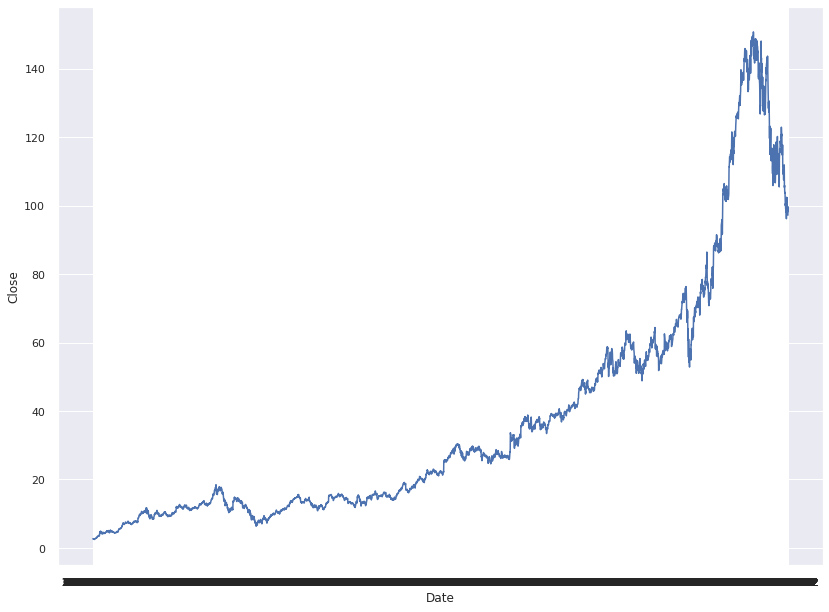

In [ ]:
sns.lineplot(data=df, x='Date', y='Close')
# plt.axes().xaxis.set_minor_locator(df.Date.DayLocator())
# sns.regplot(data=df, x='Date', y='Close', order=3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4465 entries, 0 to 4464
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4465 non-null   object 
 1   RSI     4465 non-null   float64
dtypes: float64(1), object(1)
memory usage: 69.9+ KB


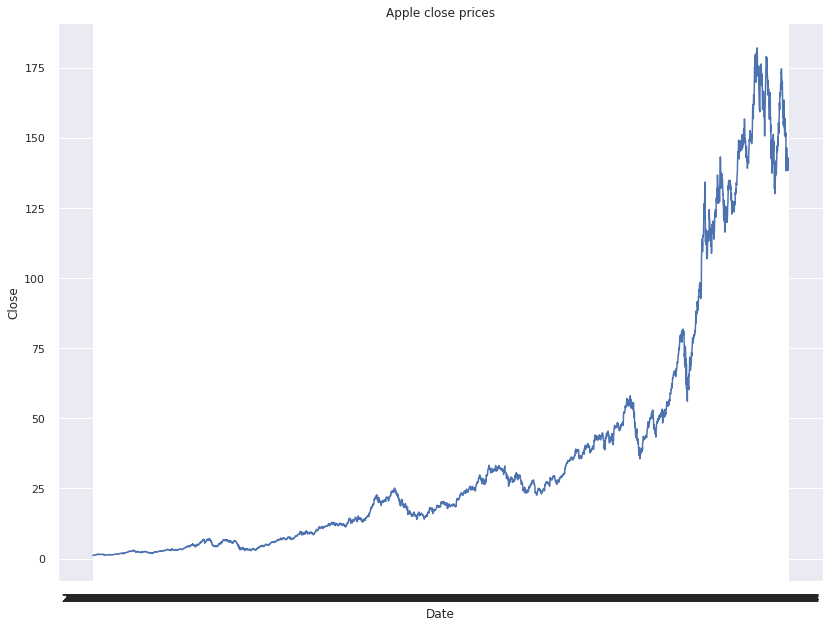

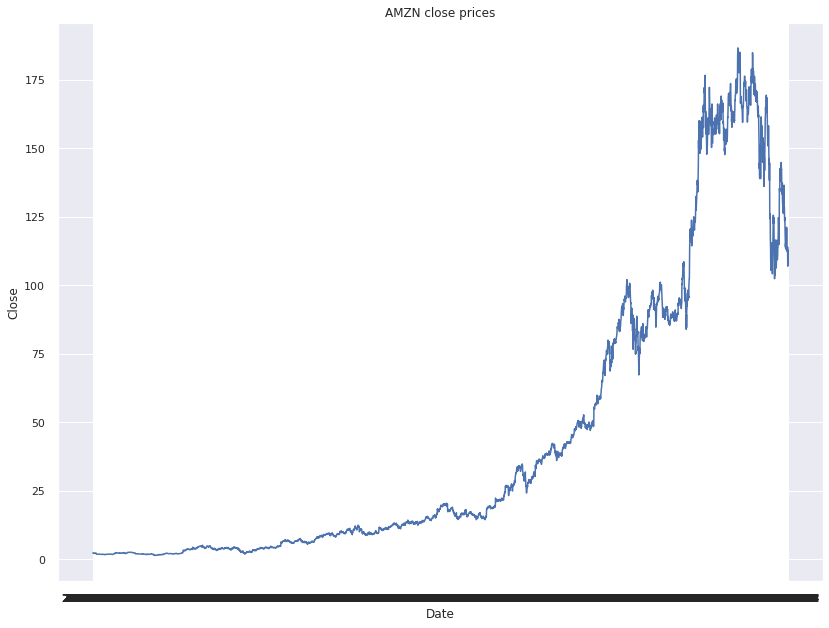

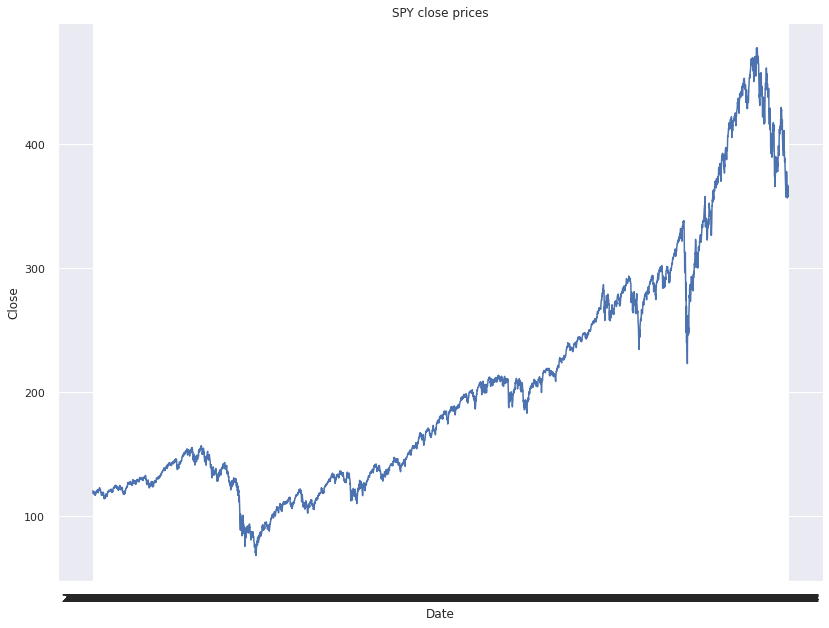

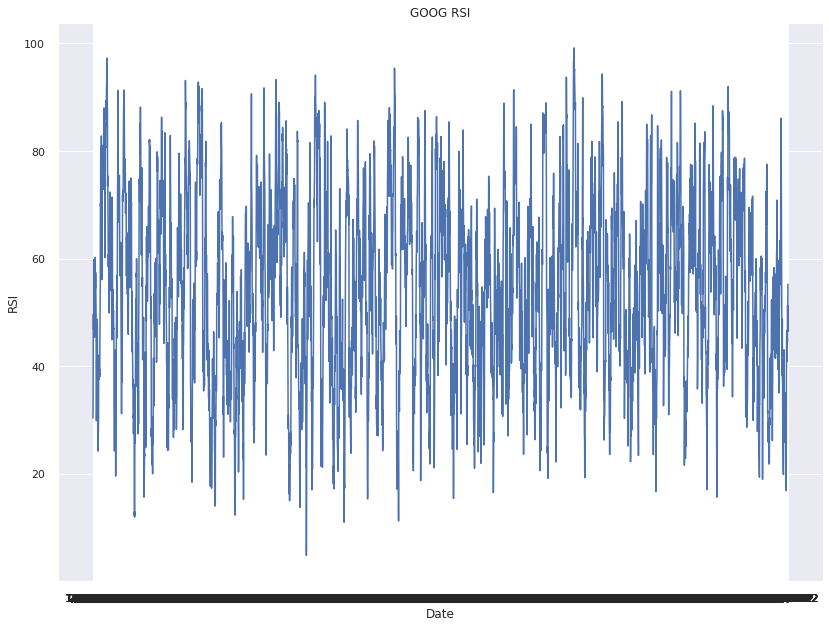

In [ ]:
df = pd.read_csv('AAPL.csv')

agg = pd.DataFrame()
agg['Date'] = pd.to_datetime(df['Date'])
agg['Close'] = df.Close
agg.groupby(agg.Date.dt.year).agg({'Close': ['min', 'max']})
df['Return'] = df.Close.pct_change()
df.head()
df.describe()
plt.figure()
plt.title("Apple close prices")
sns.lineplot(data=df, x='Date', y='Close')


df = pd.read_csv('AMZN.csv')

agg = pd.DataFrame()
agg['Date'] = pd.to_datetime(df['Date'])
agg['Close'] = df.Close
agg.groupby(agg.Date.dt.year).agg({'Close': ['min', 'max']})
df['Return'] = df.Close.pct_change()
df.head()
df.describe()
plt.figure()
plt.title("AMZN close prices")
sns.lineplot(data=df, x='Date', y='Close')


df = pd.read_csv('SPY.csv')

agg = pd.DataFrame()
agg['Date'] = pd.to_datetime(df['Date'])
agg['Close'] = df.Close
agg.groupby(agg.Date.dt.year).agg({'Close': ['min', 'max']})
df['Return'] = df.Close.pct_change()
df.head()
df.describe()
plt.figure()
plt.title("SPY close prices")
sns.lineplot(data=df, x='Date', y='Close')


df = pd.read_csv('GOOG_RSI.csv')
# df = df.set_index('Date')
df.head()

df.info()

plt.figure()
plt.title("GOOG RSI")
sns.lineplot(data=df, x='Date', y='RSI')



In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 481 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.metrics import mean_squared_error

In [ ]:
stock_data_goog = yf.download('GOOG', start='2004-08-19', end='2022-10-18')
stock_data_goog.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512


Text(0, 0.5, 'Prices ($)')

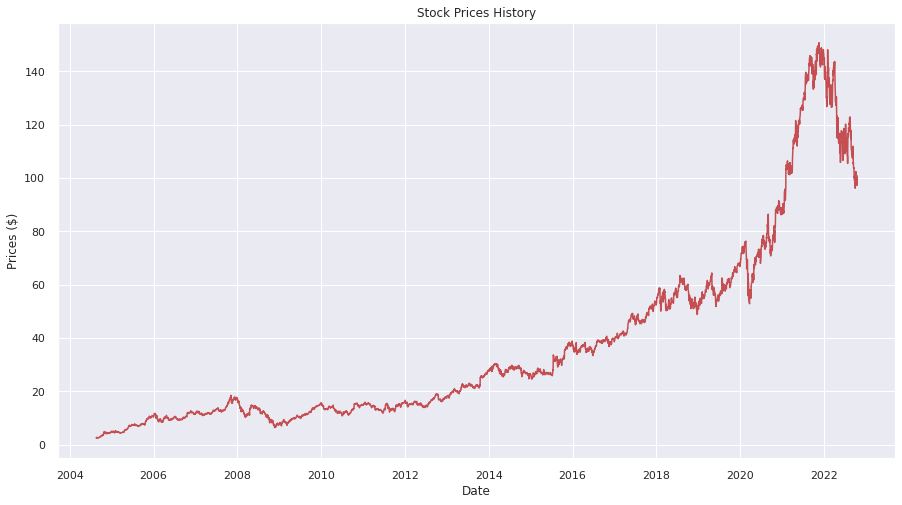

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data_goog['Close'], color='r')
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [ ]:
#Scaling the closing prices
close_prices = stock_data_goog['Open']
values = close_prices.values

scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
scaled_data

array([[-0.99972992],
       [-0.99939314],
       [-0.99614546],
       ...,
       [ 0.25118991],
       [ 0.31404426],
       [ 0.29925102]])

In [ ]:
training_data_len = math.ceil(len(values)* 0.95)

def load_data(stock, look_back):
    data_raw = scaled_data # convert to numpy array
    data = []
    
    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back): 
        data.append(data_raw[index: index + look_back])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

look_back = 30
x_train, y_train, x_test, y_test = load_data(scaled_data, look_back)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (3634, 29, 1)
y_train.shape =  (3634, 1)
x_test.shape =  (909, 29, 1)
y_test.shape =  (909, 1)


In [ ]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [ ]:
y_train.size(),x_train.size()

(torch.Size([3634, 1]), torch.Size([3634, 29, 1]))

In [ ]:
# Build model
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out
    
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())

LSTM(
  (lstm): LSTM(1, 32, num_layers=2, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
)
10
torch.Size([128, 1])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([128, 32])
torch.Size([128, 32])
torch.Size([128])
torch.Size([128])
torch.Size([1, 32])
torch.Size([1])


In [ ]:
# Train model
num_epochs = 60
hist = np.zeros(num_epochs)

# Number of steps to unroll
seq_dim =look_back-1  

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_train)

    loss = loss_fn(y_train_pred, y_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()

Epoch  10 MSE:  0.08043325692415237
Epoch  20 MSE:  0.04465939849615097
Epoch  30 MSE:  0.035826850682497025
Epoch  40 MSE:  0.025269191712141037
Epoch  50 MSE:  0.001155002391897142


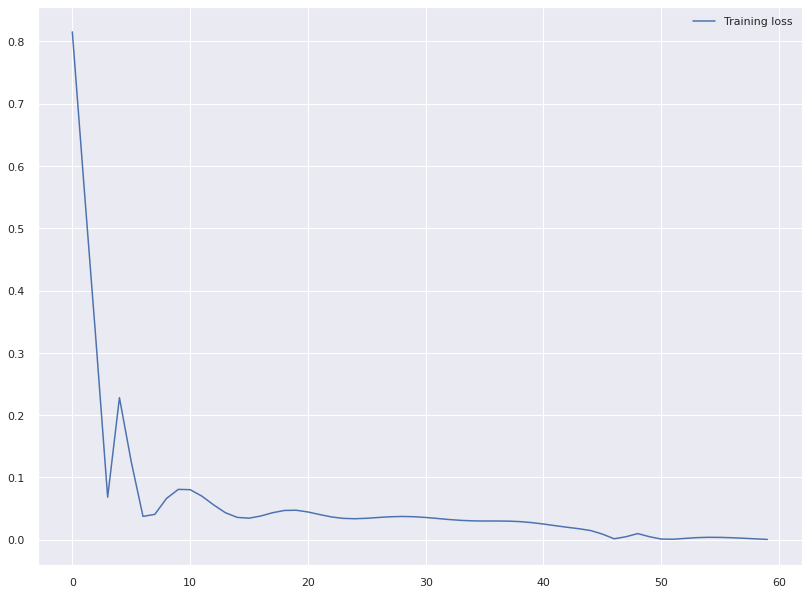

In [ ]:
plt.plot(hist, label="Training loss")
plt.legend()
plt.show()

In [ ]:
np.shape(y_train_pred)

torch.Size([3634, 1])

In [ ]:
# make predictions
y_test_pred = model(x_test)

# invert predictions
y_train_pred_inv = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train_inv = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred_inv = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test_inv = scaler.inverse_transform(y_test.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train_inv[:,0], y_train_pred_inv[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test_inv[:,0], y_test_pred_inv[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 1.78 RMSE
Test Score: 35.03 RMSE


In [ ]:
y_test_pred

tensor([[-0.3049],
        [-0.3040],
        [-0.3018],
        [-0.2982],
        [-0.2947],
        [-0.2916],
        [-0.2895],
        [-0.2877],
        [-0.2860],
        [-0.2835],
        [-0.2807],
        [-0.2792],
        [-0.2784],
        [-0.2786],
        [-0.2797],
        [-0.2810],
        [-0.2818],
        [-0.2819],
        [-0.2811],
        [-0.2801],
        [-0.2787],
        [-0.2776],
        [-0.2772],
        [-0.2770],
        [-0.2767],
        [-0.2762],
        [-0.2753],
        [-0.2740],
        [-0.2724],
        [-0.2705],
        [-0.2688],
        [-0.2668],
        [-0.2643],
        [-0.2618],
        [-0.2595],
        [-0.2572],
        [-0.2590],
        [-0.2622],
        [-0.2665],
        [-0.2706],
        [-0.2746],
        [-0.2774],
        [-0.2798],
        [-0.2824],
        [-0.2845],
        [-0.2872],
        [-0.2901],
        [-0.2937],
        [-0.2950],
        [-0.2951],
        [-0.2957],
        [-0.2963],
        [-0.

### LSTM testing data vs predicted

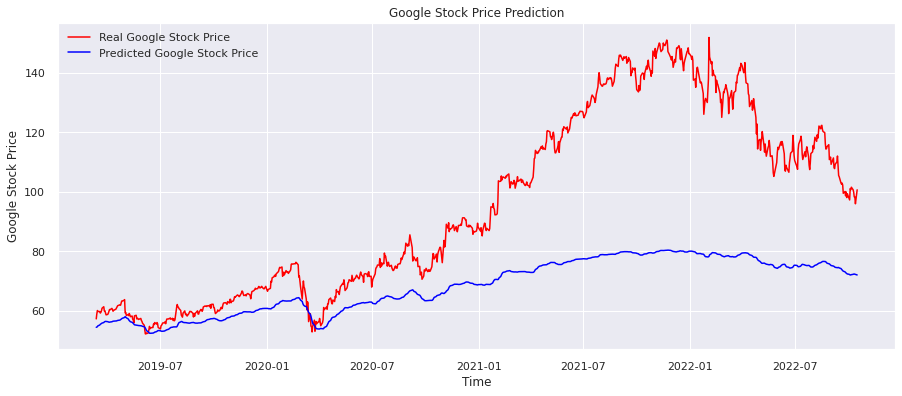

In [ ]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(stock_data_goog[len(stock_data_goog)-len(y_test):].index, y_test_inv, color = 'red', label = 'Real Google Stock Price')
axes.plot(stock_data_goog[len(stock_data_goog)-len(y_test):].index, y_test_pred_inv, color = 'blue', label = 'Predicted Google Stock Price')

#axes.xticks(np.arange(0,394,50))
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
#plt.savefig('google_pred.png')
plt.show()

### LSTM training data vs predicted

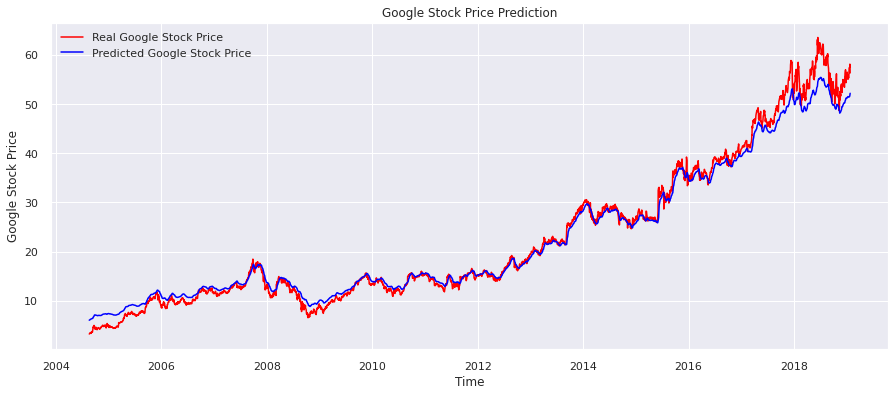

In [ ]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(stock_data_goog[:len(y_train_inv)].index, y_train_inv, color = 'red', label = 'Real Google Stock Price')
axes.plot(stock_data_goog[:len(y_train_inv)].index, y_train_pred_inv, color = 'blue', label = 'Predicted Google Stock Price')

#axes.xticks(np.arange(0,394,50))
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
#plt.savefig('google_pred.png')
plt.show()

### LSTM with RSI and inflation rate

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
LSTM(
  (lstm): LSTM(1, 1536, batch_first=True)
  (fc): Linear(in_features=1536, out_features=1, bias=True)
)
6
torch.Size([6144, 1])
torch.Size([6144, 1536])
torch.Size([6144])
torch.Size([6144])
torch.Size([1, 1536])
torch.Size([1])
Epoch  10 MSE:  0.04574498534202576
Epoch  20 MSE:  0.03507222235202789
Epoch  30 MSE:  0.02934580296278
Epoch  40 MSE:  0.012703283689916134
Epoch  50 MSE:  0.021571455523371696
Epoch  60 MSE:  0.002642079722136259
Epoch  70 MSE:  0.0010760746663436294
Epoch  80 MSE:  0.0001448302500648424
Epoch  90 MSE:  0.00014149998605716974
Epoch  100 MSE:  0.00011480333341751248


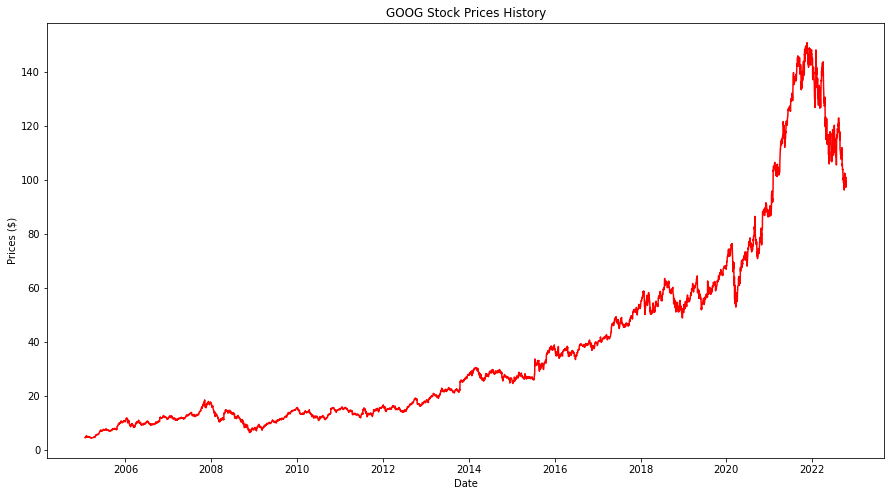

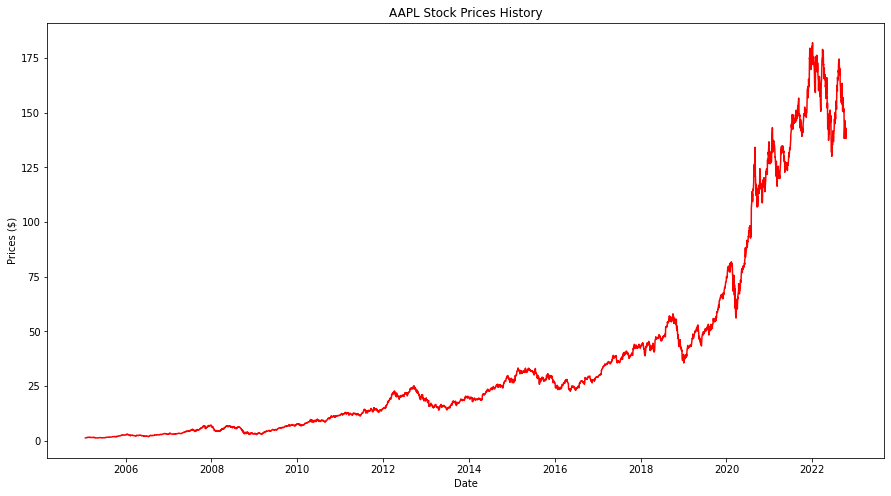

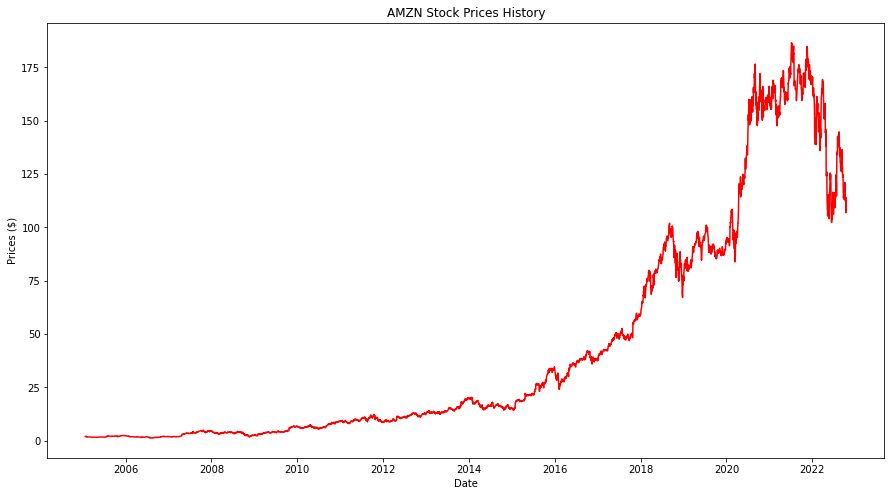

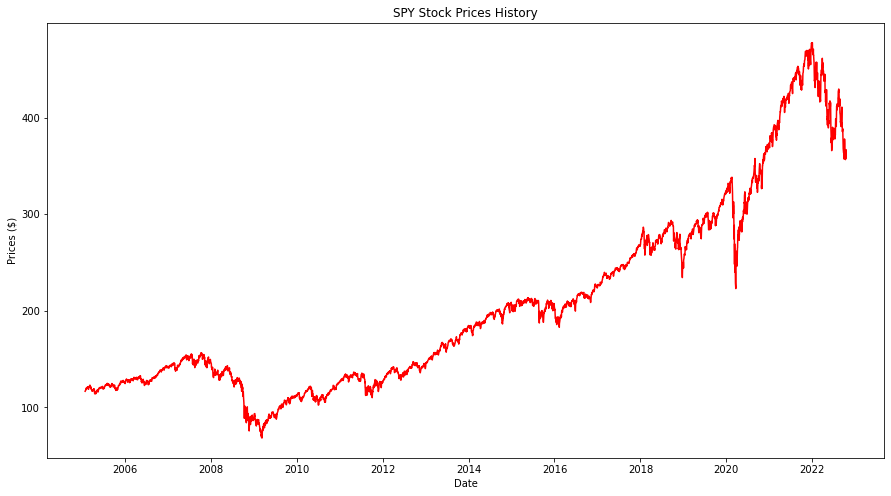

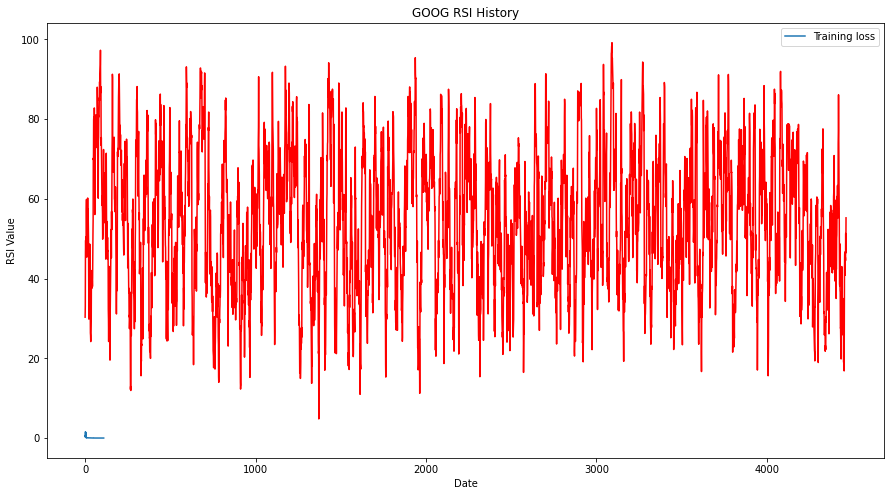

Train Score: 0.80 RMSE
Test Score: 5.83 RMSE


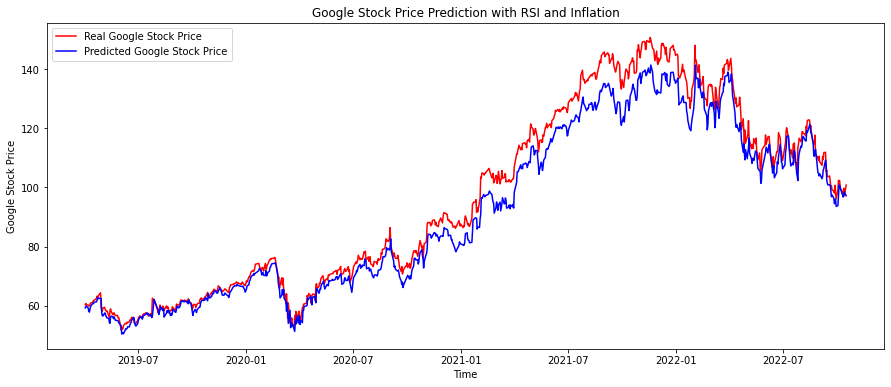

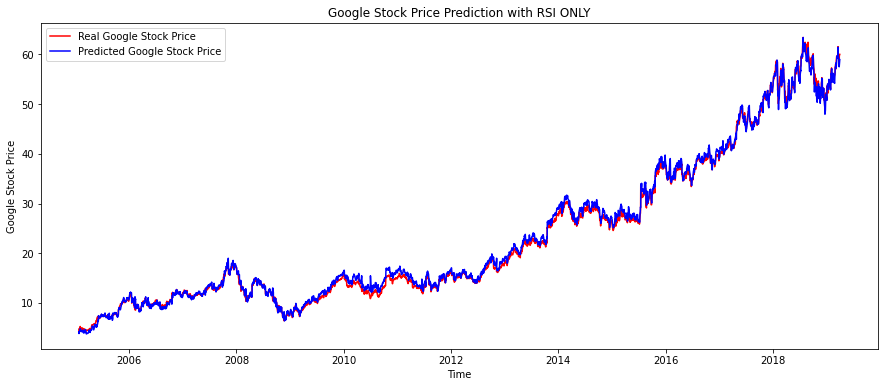

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov 25 16:01:35 2022

@author: kades
"""


import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.metrics import mean_squared_error
import datetime

random_seed = 1
torch.manual_seed(random_seed)

import random
random.seed(random_seed)

import numpy as np
np.random.seed(random_seed)

inflation_pd= pd.read_csv ('inflation_report.csv')


dates_pd=pd.read_csv('dates.csv')
dates_pd["inflation"]=None

for i in range(len(dates_pd)):
    date=(dates_pd.iloc[[i], dates_pd.columns.get_loc('Date')].values)[0] +" 00:00:00"
    date = datetime.datetime.strptime(date, "%m/%d/%Y  %H:%M:%S")
    dates_pd.at[i, 'inflation']=inflation_pd.at[-inflation_pd.at[0,'Year']+date.year, str(date.month)]


stock_data_goog = yf.download('GOOG', start='2005-01-24', end='2022-10-18')
stock_data_goog.head()


stock_data_aapl = yf.download('AAPL', start='2005-01-24', end='2022-10-18')
stock_data_aapl.head()


stock_data_amzn = yf.download('AMZN', start='2005-01-24', end='2022-10-18')
stock_data_amzn.head()



stock_data_spy = yf.download('SPY', start='2005-01-24', end='2022-10-18')
stock_data_spy.head()



df_goog_rsi = pd.read_csv ('GOOG_RSI.csv')


goog_close=stock_data_goog['Close'].values
scaler_goog = MinMaxScaler(feature_range=(-1,1))
scaled_goog_data = scaler_goog.fit_transform(goog_close.reshape(-1,1))

aapl_close=stock_data_aapl['Close'].values
scaler_aapl = MinMaxScaler(feature_range=(-1,1))
scaled_aapl_data = scaler_aapl.fit_transform(aapl_close.reshape(-1,1))

amzn_close=stock_data_amzn['Close'].values
scaler_amzn = MinMaxScaler(feature_range=(-1,1))
scaled_amzn_data = scaler_amzn.fit_transform(amzn_close.reshape(-1,1))

spy_close=stock_data_spy['Close'].values
scaler_spy = MinMaxScaler(feature_range=(-1,1))
scaled_spy_data = scaler_spy.fit_transform(spy_close.reshape(-1,1))

goog_rsi=df_goog_rsi['RSI'].values
scaler_goog_rsi = MinMaxScaler(feature_range=(-1,1))
scaled_goog_rsi_data = scaler_spy.fit_transform(goog_rsi.reshape(-1,1))

inflation_rate=dates_pd['inflation'].values
scaler_inflation = MinMaxScaler(feature_range=(-1,1))
scaled_inflation_data = scaler_spy.fit_transform(inflation_rate.reshape(-1,1))





def exp_1_setup_data(data1, data2, inflation):
    data_out=[]
    for index in range(1, len(data1)):
        data_out.append([data2[index], data1[index-1], inflation[index], data1[index]])
    data_out = np.array(data_out);
    test_set_size = int(np.round(0.2*data_out.shape[0]));
    train_set_size = data_out.shape[0] - (test_set_size);
    
    x_train = data_out[:train_set_size,:-1] #previous day's goog value and RSI and Inflation rate
    y_train = data_out[:train_set_size,-1] #next day's goog value
    
    x_test = data_out[train_set_size:,:-1]  #previous day's goog value and RSI and Inflation rate
    y_test = data_out[train_set_size:,-1] #next day's goog value
    
    return [x_train, y_train, x_test, y_test]


def exp_2_setup_data(data1, data2, data3, output):
    data_out=[]
    for index in range(1, len(data1)):
        data_out.append([data1[index-1], data2[index-1], data3[index-1], output[index]])
    data_out = np.array(data_out);
    test_set_size = int(np.round(0.2*data_out.shape[0]));
    train_set_size = data_out.shape[0] - (test_set_size);
    
    x_train = data_out[:train_set_size,:-1]
    y_train = data_out[:train_set_size,-1]
    
    x_test = data_out[train_set_size:,:-1]
    y_test = data_out[train_set_size:,-1]
    
    return [x_train, y_train, x_test, y_test]

x_goog_train, y_goog_train, x_goog_test, y_goog_test=exp_1_setup_data(scaled_goog_data, scaled_goog_rsi_data, scaled_inflation_data)


x_corr_train, y_corr_train, x_corr_test, y_corr_test=exp_2_setup_data(scaled_aapl_data, scaled_amzn_data, scaled_spy_data, scaled_goog_data)


x_goog_train = torch.from_numpy(x_goog_train).type(torch.Tensor)
x_goog_test = torch.from_numpy(x_goog_test).type(torch.Tensor)
y_goog_train = torch.from_numpy(y_goog_train).type(torch.Tensor)
y_goog_test = torch.from_numpy(y_goog_test).type(torch.Tensor)

x_corr_train = torch.from_numpy(x_corr_train).type(torch.Tensor)
x_corr_test = torch.from_numpy(x_corr_test).type(torch.Tensor)
y_corr_train = torch.from_numpy(y_corr_train).type(torch.Tensor)
y_corr_test = torch.from_numpy(y_corr_test).type(torch.Tensor)


# Build model
input_dim = 1
hidden_dim = 32*16*3
num_layers =  1
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

model2 = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

loss_fn2 = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())
    

num_epochs = 110
hist1 = np.zeros(num_epochs)
hist2 = np.zeros(num_epochs)
# Number of steps to unroll
 

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_goog_train)

    loss = loss_fn(y_train_pred, y_goog_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist1[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()
    
# for t in range(num_epochs):
#     # Initialise hidden state
#     # Don't do this if you want your LSTM to be stateful
#     #model.hidden = model.init_hidden()
    
#     # Forward pass
#     y_train_pred2 = model2(x_corr_train)

#     loss = loss_fn2(y_train_pred2, y_corr_train)
#     if t % 10 == 0 and t !=0:
#         print("Epoch ", t, "MSE: ", loss.item())
#     hist2[t] = loss.item()

#     # Zero out gradient, else they will accumulate between epochs
#     optimiser.zero_grad()

#     # Backward pass
#     loss.backward()

#     # Update parameters
#     optimiser.step()

plt.plot(hist1, label="Training loss")
plt.legend()
plt.show()

# plt.plot(hist2, label="Training loss")
# plt.legend()
# plt.show()

# make predictions
y_test_pred = model(x_goog_test)

# invert predictions
y_train_pred_inv = scaler_goog.inverse_transform(y_train_pred.detach().numpy())
y_train_inv = scaler_goog.inverse_transform(y_goog_train.detach().numpy())
y_test_pred_inv = scaler_goog.inverse_transform(y_test_pred.detach().numpy())
y_test_inv = scaler_goog.inverse_transform(y_goog_test.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train_inv[:,0], y_train_pred_inv[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test_inv[:,0], y_test_pred_inv[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(stock_data_goog[len(stock_data_goog)-len(y_goog_test):].index, y_test_inv, color = 'red', label = 'Real Google Stock Price')
axes.plot(stock_data_goog[len(stock_data_goog)-len(y_goog_test):].index, y_test_pred_inv, color = 'blue', label = 'Predicted Google Stock Price')

#axes.xticks(np.arange(0,394,50))
plt.title('Google Stock Price Prediction with RSI and Inflation')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
#plt.savefig('google_pred.png')
plt.show()

# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(stock_data_goog[:len(y_train_inv)].index, y_train_inv, color = 'red', label = 'Real Google Stock Price')
axes.plot(stock_data_goog[:len(y_train_inv)].index, y_train_pred_inv, color = 'blue', label = 'Predicted Google Stock Price')

#axes.xticks(np.arange(0,394,50))
plt.title('Google Stock Price Prediction with RSI ONLY')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
#plt.savefig('google_pred.png')
plt.show()

In [ ]:
def exp_1_setup_data(data1, data2):
    data_out=[]
    for index in range(1, len(data1)):
        data_out.append([data2[index], data1[index-1], data1[index]])
    data_out = np.array(data_out);
    test_set_size = int(np.round(0.2*data_out.shape[0]));
    train_set_size = data_out.shape[0] - (test_set_size);
    
    x_train = data_out[:train_set_size,:-1] #previous day's goog value and RSI
    y_train = data_out[:train_set_size,-1] #next day's goog value
    
    x_test = data_out[train_set_size:,:-1]  #previous day's goog value and RSI
    y_test = data_out[train_set_size:,-1] #next day's goog value
    
    return [x_train, y_train, x_test, y_test]


def exp_2_setup_data(data1, data2, data3, output):
    data_out=[]
    for index in range(1, len(data1)):
        data_out.append([data1[index-1], data2[index-1], data3[index-1], output[index]])
    data_out = np.array(data_out);
    test_set_size = int(np.round(0.2*data_out.shape[0]));
    train_set_size = data_out.shape[0] - (test_set_size);
    
    x_train = data_out[:train_set_size,:-1]
    y_train = data_out[:train_set_size,-1]
    
    x_test = data_out[train_set_size:,:-1]
    y_test = data_out[train_set_size:,-1]
    
    return [x_train, y_train, x_test, y_test]

In [ ]:
x_goog_train, y_goog_train, x_goog_test, y_goog_test=exp_1_setup_data(scaled_goog_data, scaled_goog_rsi_data)


x_corr_train, y_corr_train, x_corr_test, y_corr_test=exp_2_setup_data(scaled_aapl_data, scaled_amzn_data, scaled_spy_data, scaled_goog_data)


x_goog_train = torch.from_numpy(x_goog_train).type(torch.Tensor)
x_goog_test = torch.from_numpy(x_goog_test).type(torch.Tensor)
y_goog_train = torch.from_numpy(y_goog_train).type(torch.Tensor)
y_goog_test = torch.from_numpy(y_goog_test).type(torch.Tensor)

x_corr_train = torch.from_numpy(x_corr_train).type(torch.Tensor)
x_corr_test = torch.from_numpy(x_corr_test).type(torch.Tensor)
y_corr_train = torch.from_numpy(y_corr_train).type(torch.Tensor)
y_corr_test = torch.from_numpy(y_corr_test).type(torch.Tensor)


# Build model
input_dim = 1
hidden_dim = 32*10
num_layers =  1
output_dim = 1


# Here we define our model as a class
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        # Hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.num_layers = num_layers

        # batch_first=True causes input/output tensors to be of shape
        # (batch_dim, seq_dim, feature_dim)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # Initialize cell state
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()

        # We need to detach as we are doing truncated backpropagation through time (BPTT)
        # If we don't, we'll backprop all the way to the start even after going through another batch
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))

        # Index hidden state of last time step
        # out.size() --> 100, 32, 100
        # out[:, -1, :] --> 100, 100 --> just want last time step hidden states! 
        out = self.fc(out[:, -1, :]) 
        # out.size() --> 100, 10
        return out

model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

model2 = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)

loss_fn = torch.nn.MSELoss()

loss_fn2 = torch.nn.MSELoss()

optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
optimiser2 = torch.optim.Adam(model2.parameters(), lr=0.01)

print(model)
print(len(list(model.parameters())))
for i in range(len(list(model.parameters()))):
    print(list(model.parameters())[i].size())
    

num_epochs = 120
hist1 = np.zeros(num_epochs)
hist2 = np.zeros(num_epochs)
# Number of steps to unroll
 

for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred = model(x_goog_train)

    loss = loss_fn(y_train_pred, y_goog_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist1[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser.step()
    
for t in range(num_epochs):
    # Initialise hidden state
    # Don't do this if you want your LSTM to be stateful
    #model.hidden = model.init_hidden()
    
    # Forward pass
    y_train_pred2 = model2(x_corr_train)

    loss = loss_fn2(y_train_pred2, y_corr_train)
    if t % 10 == 0 and t !=0:
        print("Epoch ", t, "MSE: ", loss.item())
    hist2[t] = loss.item()

    # Zero out gradient, else they will accumulate between epochs
    optimiser2.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimiser2.step()

LSTM(
  (lstm): LSTM(1, 320, batch_first=True)
  (fc): Linear(in_features=320, out_features=1, bias=True)
)
6
torch.Size([1280, 1])
torch.Size([1280, 320])
torch.Size([1280])
torch.Size([1280])
torch.Size([1, 320])
torch.Size([1])
Epoch  10 MSE:  0.02958611398935318
Epoch  20 MSE:  0.025426872074604034
Epoch  30 MSE:  0.021175339818000793
Epoch  40 MSE:  0.013435754925012589
Epoch  50 MSE:  0.0052781435661017895
Epoch  60 MSE:  0.0003393743827473372
Epoch  70 MSE:  0.0005566030158661306
Epoch  80 MSE:  0.0001319152070209384
Epoch  90 MSE:  0.0001066082259058021
Epoch  100 MSE:  5.661619798047468e-05
Epoch  110 MSE:  5.09307901666034e-05
Epoch  10 MSE:  0.03655127435922623
Epoch  20 MSE:  0.009453300386667252
Epoch  30 MSE:  0.003760199062526226
Epoch  40 MSE:  0.0026221114676445723
Epoch  50 MSE:  0.0014379486674442887
Epoch  60 MSE:  0.0012717770878225565
Epoch  70 MSE:  0.0012662096414715052
Epoch  80 MSE:  0.0012023078743368387
Epoch  90 MSE:  0.0011636152630671859
Epoch  100 MSE:  

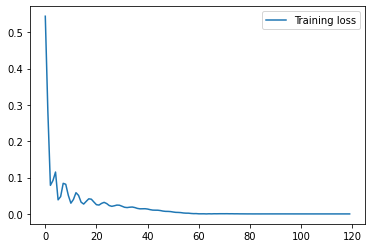

In [ ]:
plt.plot(hist1, label="Training loss")
plt.legend()
plt.show()

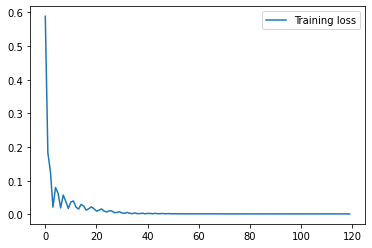

In [ ]:
plt.plot(hist2, label="Training loss")
plt.legend()
plt.show()

### Results of LSTM with RSI

In [ ]:
# make predictions
y_test_pred = model(x_goog_test)

# invert predictions
y_train_pred_inv = scaler_goog.inverse_transform(y_train_pred.detach().numpy())
y_train_inv = scaler_goog.inverse_transform(y_goog_train.detach().numpy())
y_test_pred_inv = scaler_goog.inverse_transform(y_test_pred.detach().numpy())
y_test_inv = scaler_goog.inverse_transform(y_goog_test.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train_inv[:,0], y_train_pred_inv[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test_inv[:,0], y_test_pred_inv[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.51 RMSE
Test Score: 11.22 RMSE


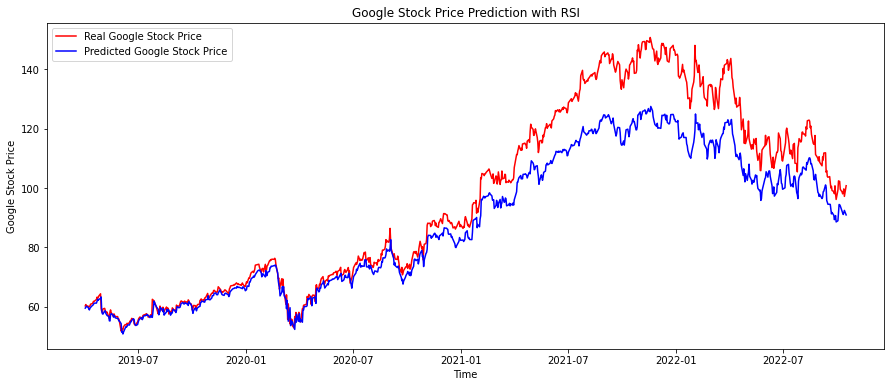

In [ ]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(stock_data_goog[len(stock_data_goog)-len(y_goog_test):].index, y_test_inv, color = 'red', label = 'Real Google Stock Price')
axes.plot(stock_data_goog[len(stock_data_goog)-len(y_goog_test):].index, y_test_pred_inv, color = 'blue', label = 'Predicted Google Stock Price')

#axes.xticks(np.arange(0,394,50))
plt.title('Google Stock Price Prediction with RSI')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
#plt.savefig('google_pred.png')
plt.show()

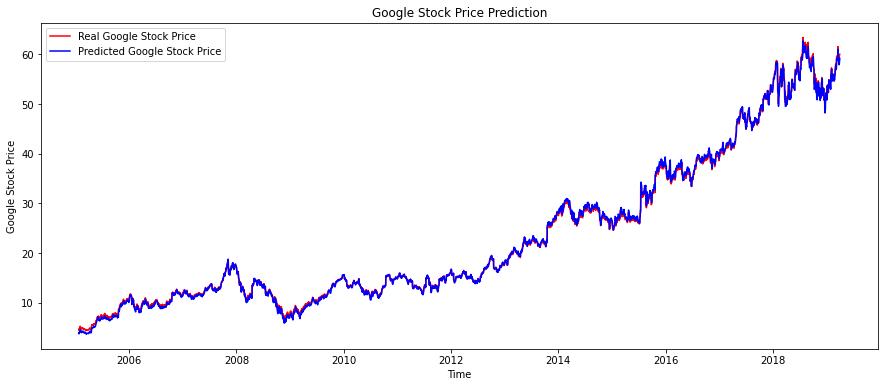

In [ ]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(stock_data_goog[:len(y_train_inv)].index, y_train_inv, color = 'red', label = 'Real Google Stock Price')
axes.plot(stock_data_goog[:len(y_train_inv)].index, y_train_pred_inv, color = 'blue', label = 'Predicted Google Stock Price')

#axes.xticks(np.arange(0,394,50))
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
#plt.savefig('google_pred.png')
plt.show()

### Results of LSTM with correlated stock

In [ ]:
# make predictions
y_test_pred = model2(x_corr_test)

# invert predictions
y_train_pred_inv = scaler_goog.inverse_transform(y_train_pred2.detach().numpy())
y_train_inv = scaler_goog.inverse_transform(y_corr_train.detach().numpy())
y_test_pred_inv = scaler_goog.inverse_transform(y_test_pred.detach().numpy())
y_test_inv = scaler_goog.inverse_transform(y_corr_test.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train_inv[:,0], y_train_pred_inv[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test_inv[:,0], y_test_pred_inv[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.45 RMSE
Test Score: 22.60 RMSE


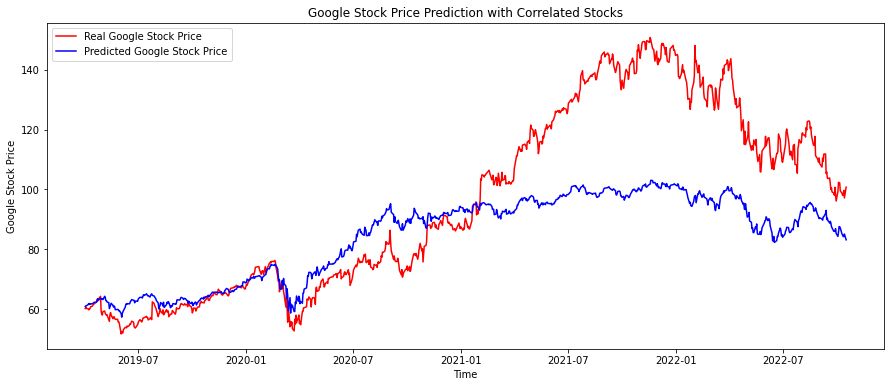

In [ ]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(stock_data_goog[len(stock_data_goog)-len(y_corr_test):].index, y_test_inv, color = 'red', label = 'Real Google Stock Price')
axes.plot(stock_data_goog[len(stock_data_goog)-len(y_corr_test):].index, y_test_pred_inv, color = 'blue', label = 'Predicted Google Stock Price')

#axes.xticks(np.arange(0,394,50))
plt.title('Google Stock Price Prediction with Correlated Stocks')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
#plt.savefig('google_pred.png')
plt.show()

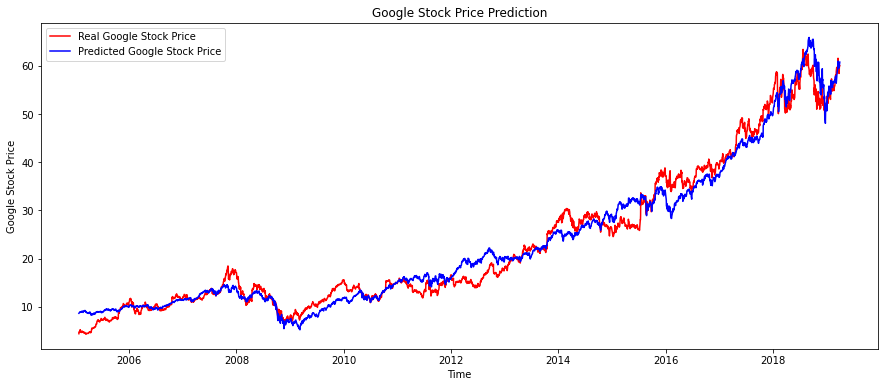

In [ ]:
# Visualising the results
figure, axes = plt.subplots(figsize=(15, 6))
axes.xaxis_date()

axes.plot(stock_data_goog[:len(y_train_inv)].index, y_train_inv, color = 'red', label = 'Real Google Stock Price')
axes.plot(stock_data_goog[:len(y_train_inv)].index, y_train_pred_inv, color = 'blue', label = 'Predicted Google Stock Price')

#axes.xticks(np.arange(0,394,50))
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
#plt.savefig('google_pred.png')
plt.show()